In [1]:
# ML ASSIGNMENT5-CLUSTERING ALGORITHM
# Objective: 
# The objective of this assessment is to evaluate your understanding and ability to apply clustering techniques to a real-world dataset. 

# Dataset 
# Use the Iris dataset available in the sklearn library. 

# Key components to be fulfilled : 
# 1. Loading and Preprocessing (1 marks) 
# Load the Iris dataset from sklearn. 
# Drop the species column since this is a clustering problem. 

# 2.Clustering Algorithm Implementation  
# Implement the following two clustering algorithms: 

# A) KMeans Clustering (4 marks) 
# Provide a brief description of how KMeans clustering works. 
# Explain why KMeans clustering might be suitable for the Iris dataset. 
# Apply KMeans clustering to the preprocessed Iris dataset and visualize the clusters. 

# B) Hierarchical Clustering (4 marks) 
# Provide a brief description of how Hierarchical clustering works. 
# Explain why Hierarchical clustering might be suitable for the Iris dataset. 
# Apply Hierarchical clustering to the preprocessed Iris dataset and visualize the clusters.

In [15]:
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [16]:
from sklearn import datasets
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score,calinski_harabasz_score
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

In [17]:
# Load the Iris dataset
iris = datasets.load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)


In [18]:
# Display the first few rows
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [19]:
data.shape

(150, 4)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [21]:
null_values=data.isnull().sum()
print("The null values in each column:\n",null_values)

The null values in each column:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


In [22]:
data.duplicated().sum()

1

In [23]:
data=data.drop_duplicates()

In [24]:
data.duplicated().sum()

0

In [25]:
# Standardizing the features
scaler=StandardScaler()
scaled_features=scaler.fit_transform(data)

# KMeans Clustering


KMeans clustering partitions data into K clusters by minimizing variance within clusters.

It iteratively assigns points to the nearest cluster center and updates the centroids until convergence.

It's suitable for the Iris dataset as we expect natural groupings of flower species.


In [13]:
# Elbow Method to Determine Optimal Number of Clusters
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

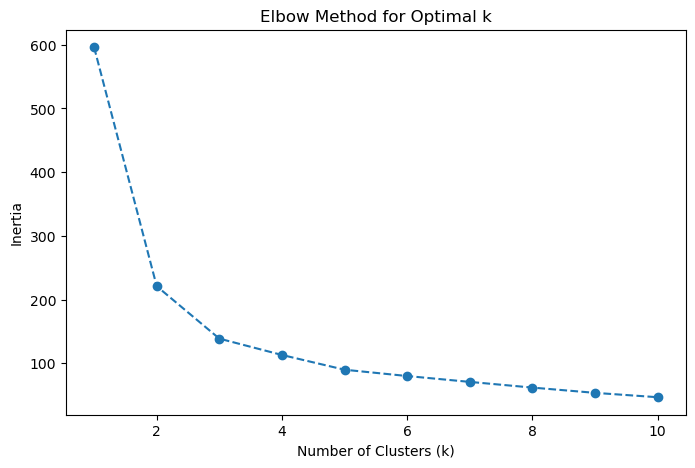

In [26]:
# Plotting the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()

# Hierarchical Clustering 

Hierarchical clustering creates a hierarchy of clusters using either a top-down (divisive) or bottom-up (agglomerative) approach.

Agglomerative clustering starts with individual points and merges them based on similarity.

It's useful for the Iris dataset as it provides a dendrogram to visualize the merging of clusters.

In [30]:
# Choose Optimal Number of Clusters 
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels=kmeans.fit_predict(scaled_features)


In [31]:
data["Cluster"]=kmeans.labels_
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>

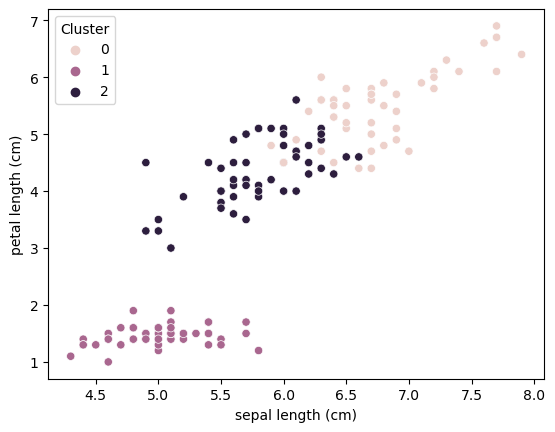

In [32]:
sns.scatterplot(data=data,x="sepal length (cm)",y="petal length (cm)",hue="Cluster")

In [36]:
# Evaluate Model Performance
# 1. Silhouette Score
sil_score = silhouette_score(scaled_features, cluster_labels)
print(f"Silhouette Score: {sil_score:.2f}")

# 2. Davies-Bouldin Index
db_score = davies_bouldin_score(scaled_features, cluster_labels)
print(f"Davies-Bouldin Index: {db_score:.2f}")

from sklearn.metrics import calinski_harabasz_score

# Calculate Calinski-Harabasz Index
ch_score = calinski_harabasz_score(scaled_features, cluster_labels)
print(f"Calinski-Harabasz Index: {ch_score:.2f}")


Silhouette Score: 0.46
Davies-Bouldin Index: 0.83
Calinski-Harabasz Index: 240.53


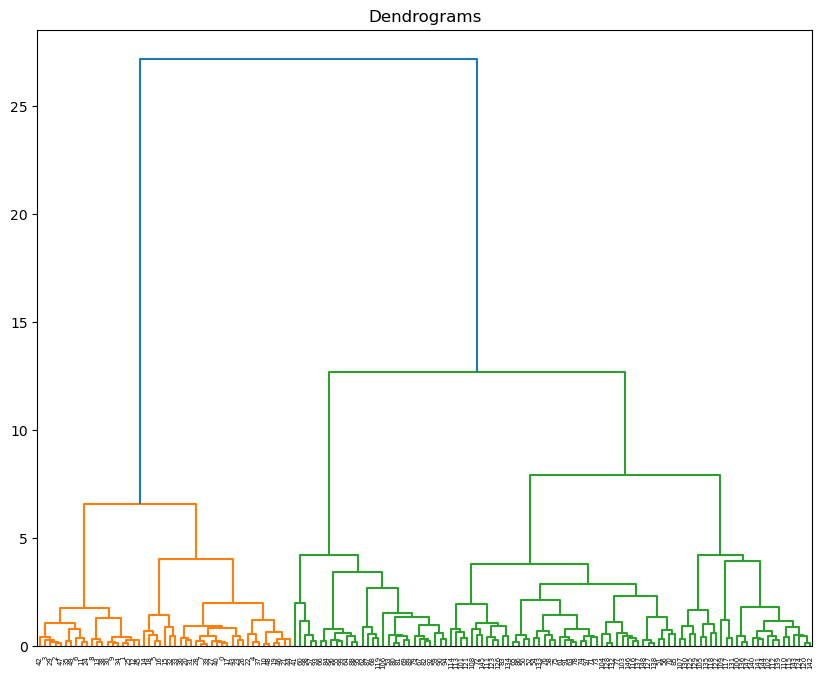

In [39]:
# Plotting a Dendrogram
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage (scaled_features, method='ward'))


The dendrogram helps understand how clusters are merged.
